CSCI 4852 & 6952: Deep Learning (Spring 2023)  

Instructor: Alina Lazar (alazar@ysu.edu)  
GitHub repository:https://github.com/alinutzal/CSCI-xx52-Deep-Learning-

In [1]:
%load_ext watermark
%watermark -v -p torch

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.4.0

torch: 1.13.1



## Autograd Example

In [2]:
import torch
from torch.autograd import grad
import torch.nn.functional as F

Suppose we have the following function graph (this example is from the lecture slides):

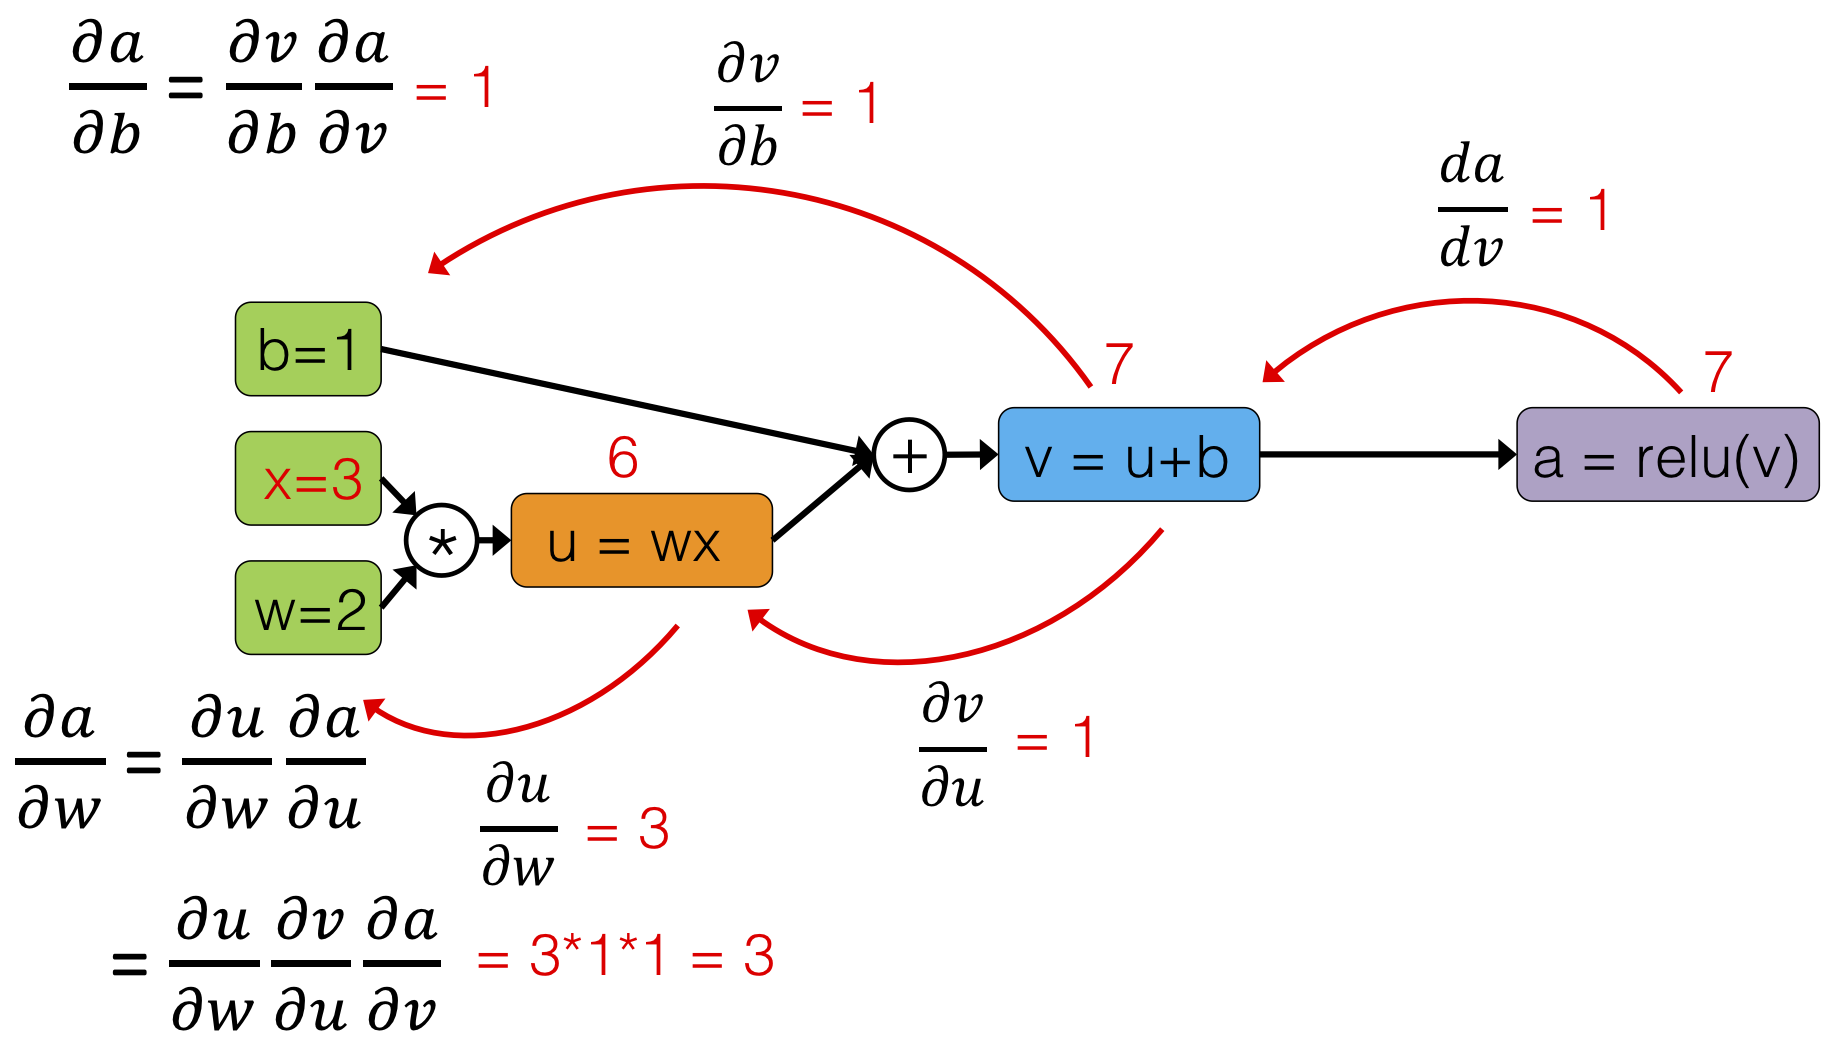![](images/relu-graph.png)

In PyTorch, the function is defined and computed as follows:

In [3]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
a = F.relu(x*w + b)

In [4]:
a

tensor([7.], grad_fn=<ReluBackward0>)

By default, PyTorch will automatically build a computation graph in the background if variables have the parameter `requires_grad=True` set. If new variables without that parameter set to `True` are used in a computation with a variable that has `requires_grad=True`, these new variables will also automatically have gradients set to `True` (this simply means that gradients for these variables will be computed; it is wasteful to set it to `True` if we don't need that variable's gradient; for example, we usually don't need the gradients of he training inputs `x`).

Let's compute the derivative of a with respect to w:

In [5]:
grad(a, w, retain_graph=True)

(tensor([3.]),)

Above, the `retain_graph=True` means the computation graph will be kept in memory -- this is for example purposes so that we can use the `grad` function again below. In practice, we usually want to free the computation graph in every round.

In [6]:
grad(a, b)

(tensor([1.]),)

<br>
<br>

Note that PyTorch functions are usually more efficient, but we could also implement our own ReLU function as shown below:

In [7]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

def my_relu(z):
    if z > 0.:
        return z
    else:
        z[:] = 0.
        return z

a = my_relu(x*w + b)
grad(a, w)

(tensor([3.]),)

Note that even though the derivative of ReLU is not defined at 0, PyTorch autograd will do something that is reasonable for practical purposes:

In [8]:
x = torch.tensor([-1.])
w = torch.tensor([1.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

def my_relu(z):
    if z > 0.:
        return z
    else:
        z[:] = 0.
        return z

a = F.relu(x*w + b)
grad(a, w, retain_graph=False)

(tensor([-0.]),)